In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.svm import SVC

In [148]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [149]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

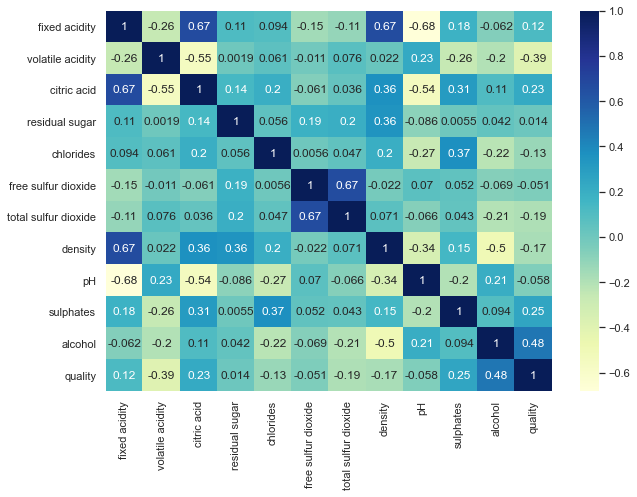

In [151]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)

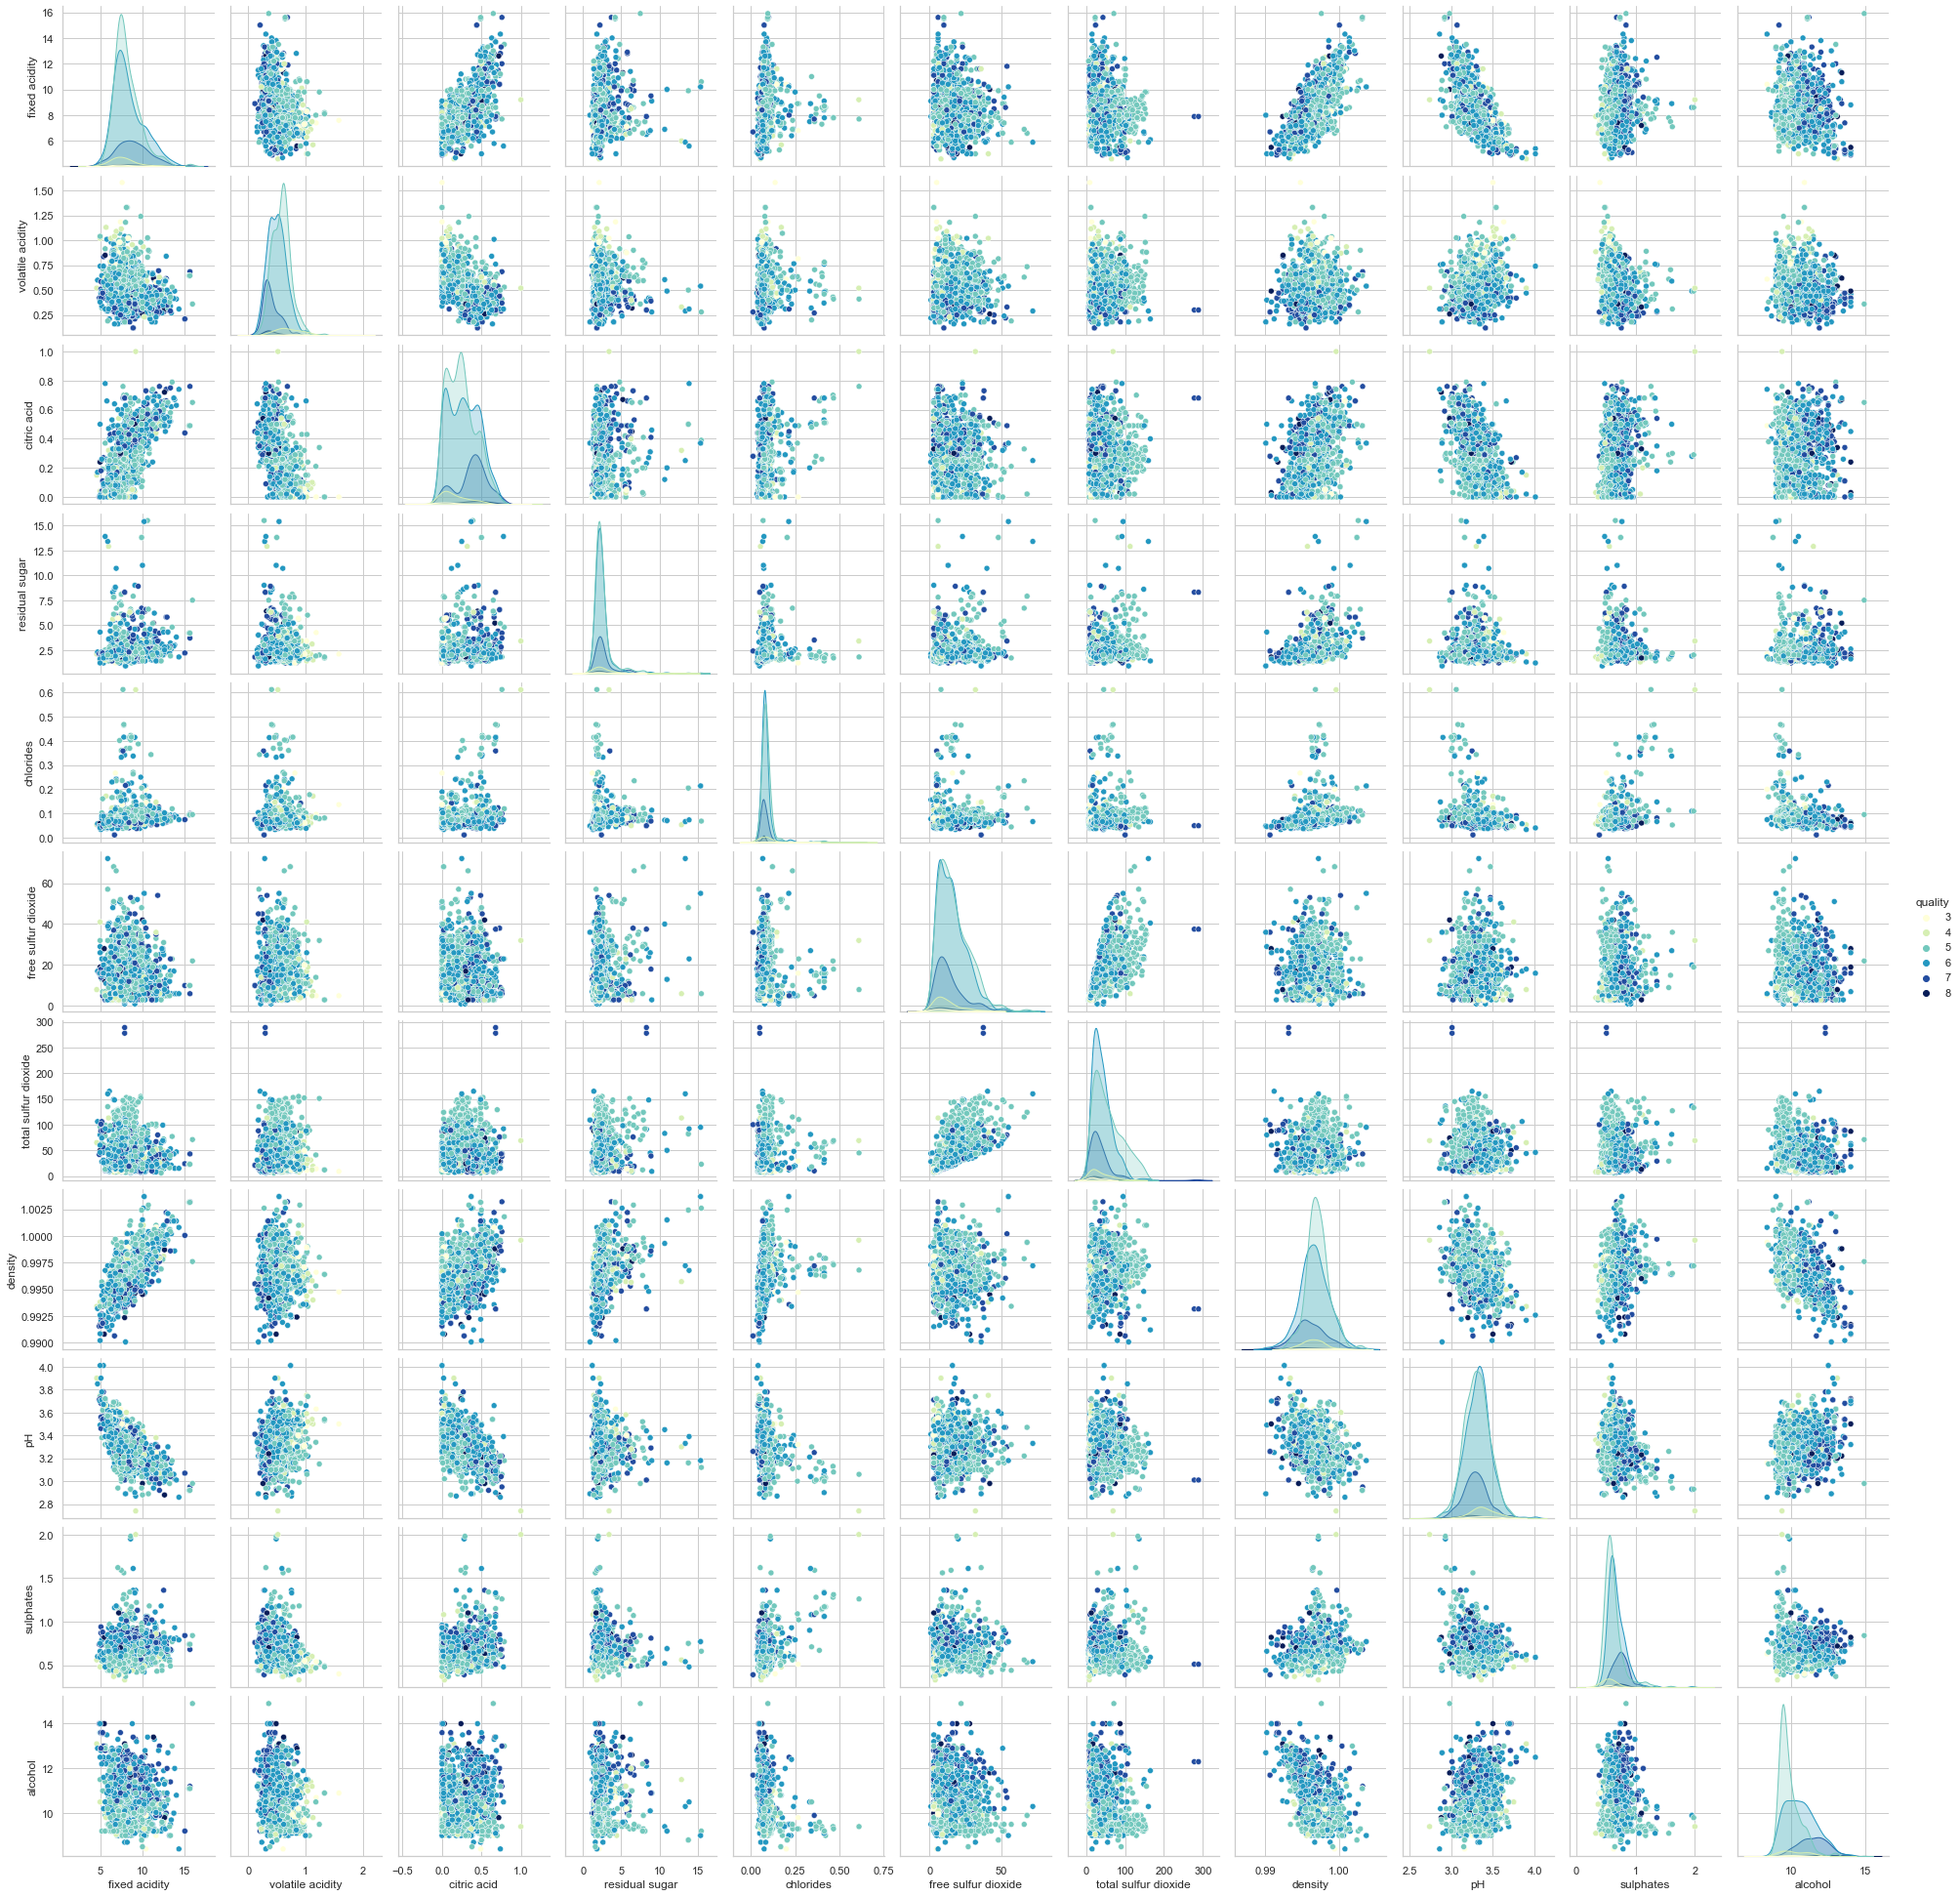

In [152]:
ax = sns.pairplot(df, hue="quality",diag_kind="kde",kind="scatter",palette="YlGnBu")
plt.show()

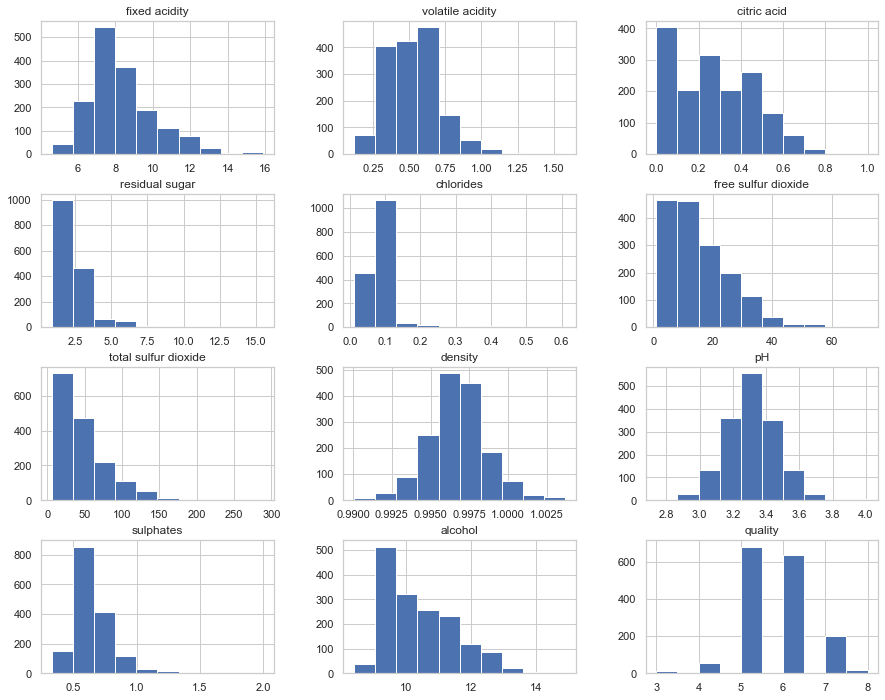

In [153]:
df.hist(bins=10,figsize=(15,12))
plt.show()

In [154]:
#df['quality'] = df.quality.apply(lambda x : 2 if x > 6.5 else (1 if x > 4.5 else 0))

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

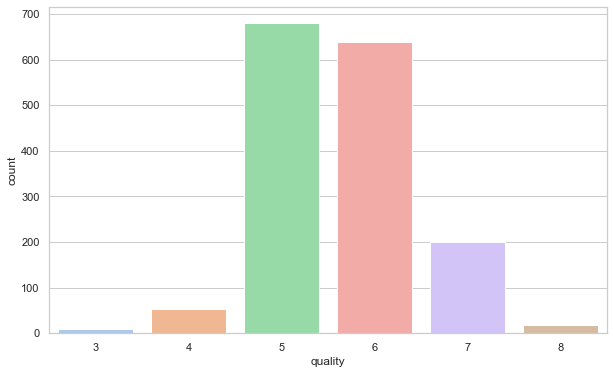

In [155]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=df, palette='pastel')

In [156]:
df['quality'] = df.quality.apply(lambda x : 1 if x > 6 else 0)

In [157]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

<AxesSubplot:xlabel='quality', ylabel='count'>

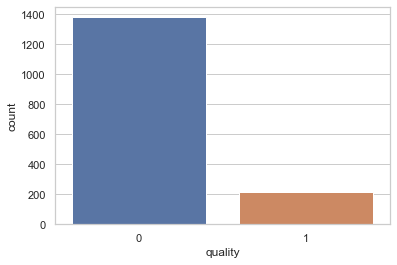

In [158]:
sns.countplot(x='quality', data=df, palette="deep")

0    1382
1     217
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

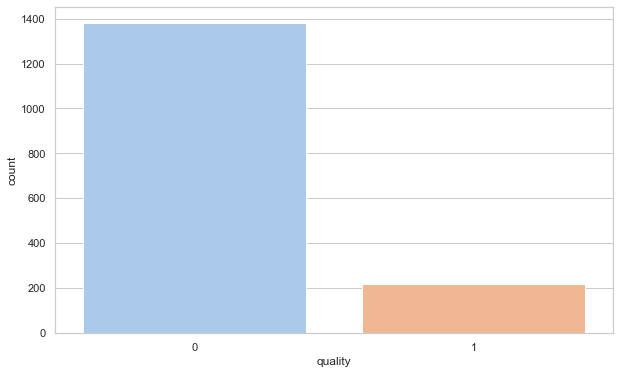

In [159]:
sns.set(style="whitegrid")
print(df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot('quality', data=df, palette='pastel')

<AxesSubplot:>

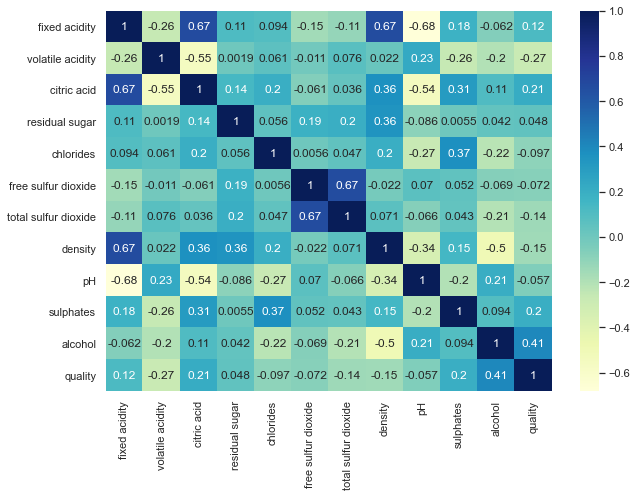

In [160]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


In [161]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [162]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [163]:
X_train.shape, X_val.shape

((1199, 11), (400, 11))

In [164]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [165]:
cv = StratifiedKFold(n_splits=5)

# Decision Tree

In [166]:
dtc = DecisionTreeClassifier(min_samples_split=7,random_state=42)
dtc.fit(X_train, y_train)

pred_dtc = dtc.predict(X_val)

score = dtc.score(X_val, y_val)

In [167]:
print(classification_report(y_val, pred_dtc))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       346
           1       0.55      0.54      0.54        54

    accuracy                           0.88       400
   macro avg       0.74      0.73      0.74       400
weighted avg       0.88      0.88      0.88       400



Cross validation

In [168]:
dtc_scores = cross_val_score(dtc, X_train, y_train, cv=cv)

def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

display_scores(dtc_scores)

Scores: [0.8625     0.86666667 0.875      0.84583333 0.83263598]
Mean: 0.8565271966527197
Standard deviation: 0.015263528329940972


Plot confusion matrix

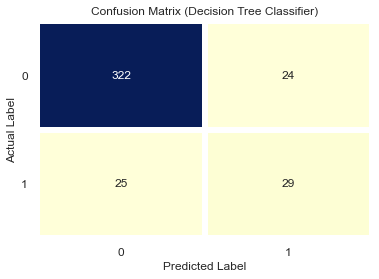

In [169]:
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix(y_val, pred_dtc), cmap="YlGnBu", annot=True, fmt= 'd', linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Decision Tree Classifier)", size = 12)
plt.show()

Text(0.5, 1.0, 'ROC Curve (Decision Tree Classifier)')

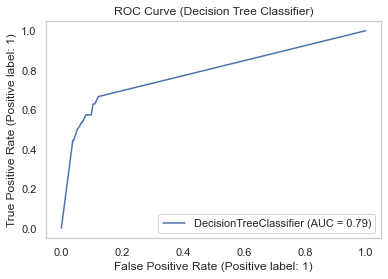

In [170]:
dtc_plot = plot_roc_curve(dtc, X_val, y_val)
plt.grid()
plt.title("ROC Curve (Decision Tree Classifier)")

Text(0.5, 1.0, 'Precision Recall Curve (Decision Tree Classifier)')

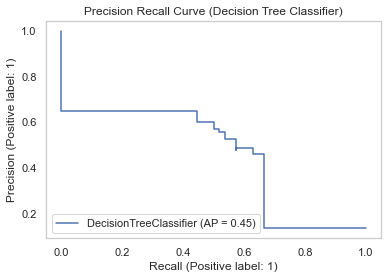

In [171]:
plot_precision_recall_curve(dtc, X_val, y_val)
plt.grid()
plt.title("Precision Recall Curve (Decision Tree Classifier)")

In [172]:
dtree_params = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,30,40,50]}
decision_tree_classifier_cv = GridSearchCV(DecisionTreeClassifier(), dtree_params, cv=10)
decision_tree_classifier_cv.fit(X_val, y_val)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 30, 40, 50]})

In [173]:
decision_tree_classifier_cv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [174]:
def plot_learning_curves(dtc, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        dtc.fit(X_train[:m], y_train[:m])
        y_train_predict = dtc.predict(X_train[:m])
        y_val_predict = dtc.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

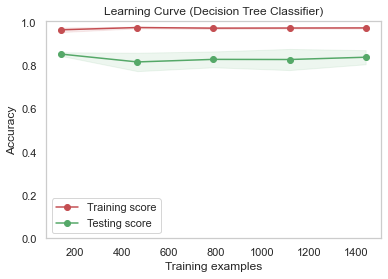

In [175]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

X = X
y = y
title = "Learning Curve (Decision Tree Classifier)"
cv = 10
estimator = dtc

plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=1)
plt.show()

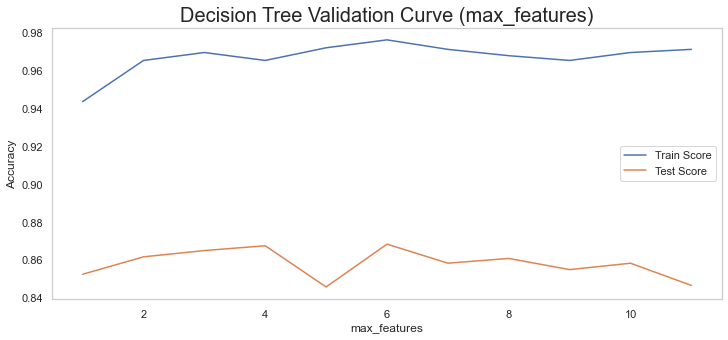

In [176]:
dtc_mf_test_scores = []
dtc_mf_train_scores = []

for i in range(1,12):

    dtc_mf = DecisionTreeClassifier(min_samples_split=7, max_features = i, random_state=42)
    dtc_mf.fit(X_train,y_train)
    
    dtc_mf_train_scores.append(dtc_mf.score(X_train,y_train))
    dtc_mf_test_scores.append(cross_val_score(dtc_mf, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("Decision Tree Validation Curve (max_features)",fontsize= 20)
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.plot(range(1,12),dtc_mf_train_scores,marker='',label='Train Score')
plt.plot(range(1,12),dtc_mf_test_scores,marker='',label='Test Score')
plt.grid()
plt.legend(loc="best")

In [177]:
dtc_mf_max_test_score = max(dtc_mf_test_scores)
dtc_mf_test_scores_ind = [i for i, v in enumerate(dtc_mf_test_scores) if v == dtc_mf_max_test_score]
print('Max test score {} % and max_features = {}'.format(dtc_mf_max_test_score*100,list(map(lambda x: x+1, dtc_mf_test_scores_ind))))

Max test score 86.82422969187675 % and max_features = [6]


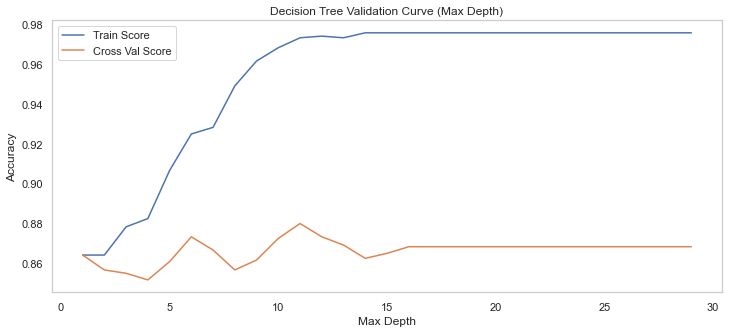

In [178]:
dtc1_test_scores = []
dtc1_train_scores = []

for i in range(1,30):

    dtc_md = DecisionTreeClassifier(max_depth=i,max_features=6,random_state=42,min_samples_split=7)
    dtc_md.fit(X_train,y_train)
    
    dtc1_train_scores.append(dtc_md.score(X_train,y_train))
    dtc1_test_scores.append(cross_val_score(dtc_md, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("Decision Tree Validation Curve (Max Depth)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(range(1,30),dtc1_train_scores,marker='',label='Train Score')
plt.plot(range(1,30),dtc1_test_scores,marker='',label='Cross Val Score')
plt.grid()
plt.legend(loc="best")

In [179]:
dtc1_max_test_score = max(dtc1_test_scores)
dtc1_test_scores_ind = [i for i, v in enumerate(dtc1_test_scores) if v == dtc1_max_test_score]
print('Max test score {} % and max depth = {}'.format(dtc1_max_test_score*100,list(map(lambda x: x+1, dtc1_test_scores_ind))))

Max test score 87.99019607843137 % and max depth = [11]


In [180]:
print(dtc1_test_scores)

[0.8640546218487396, 0.8565546218487394, 0.8548809523809524, 0.8515546218487395, 0.860735294117647, 0.8732282913165268, 0.86656162464986, 0.8565546218487394, 0.8615546218487395, 0.8724089635854341, 0.8799019607843137, 0.8732352941176471, 0.8690686274509805, 0.8624019607843139, 0.8649019607843137, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675, 0.8682422969187675]


In [181]:
dtc_final = DecisionTreeClassifier(max_depth=11, min_samples_split=7, max_features = 6, random_state=42)
dtc_final.fit(X_train, y_train)

pred_dtc = dtc_final.predict(X_val)

dtc_final_score = dtc_final.score(X_val, y_val)
print(dtc_final_score)

0.8875


In [182]:
dtc_final_scores = cross_val_score(DecisionTreeClassifier(max_depth=8, min_samples_split=7, max_features = 6, random_state=42), X, y, cv=70)
print(dtc_final_scores.mean())
print(dtc_final_scores)

0.8880293619424052
[0.86956522 0.86956522 0.95652174 0.91304348 0.82608696 0.91304348
 0.73913043 0.86956522 0.91304348 0.91304348 0.91304348 0.86956522
 0.95652174 0.91304348 0.86956522 0.95652174 0.91304348 0.91304348
 0.95652174 0.82608696 0.7826087  0.95652174 0.82608696 0.82608696
 0.7826087  0.86956522 0.91304348 0.95652174 0.95652174 0.95652174
 0.86956522 0.82608696 0.91304348 0.95652174 0.86956522 0.95652174
 0.95652174 0.86956522 0.82608696 0.95652174 0.82608696 0.91304348
 0.7826087  0.91304348 0.95652174 0.82608696 0.82608696 0.86956522
 0.91304348 0.7826087  0.95652174 0.7826087  0.95652174 0.86956522
 0.91304348 0.86956522 0.86956522 0.95652174 0.95652174 0.95454545
 0.86363636 1.         0.86363636 1.         0.72727273 0.95454545
 0.90909091 0.95454545 0.77272727 0.72727273]


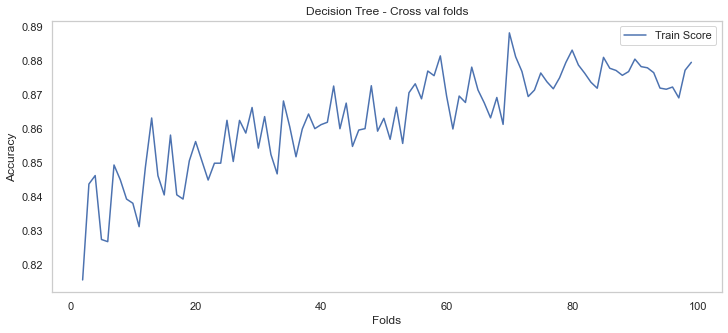

In [183]:
dtc_final_cv = []


for i in range(2,100):
    dtcfinal_cv = cross_val_score(DecisionTreeClassifier(max_depth=8, min_samples_split=7, max_features = 6, random_state=42), X, y, cv=i)
    dtc_final_cv.append(dtcfinal_cv.mean())


plt.figure(figsize=(12,5))
plt.title("Decision Tree - Cross val folds")
plt.xlabel("Folds")
plt.ylabel("Accuracy")
plt.plot(range(2,100),dtc_final_cv,marker='',label='Train Score')
plt.grid()
plt.legend(loc="best")

In [184]:
dtcf_max_test_score = max(dtc_final_cv)
dtcf_test_scores_ind = [i for i, v in enumerate(dtc_final_cv) if v == dtcf_max_test_score]
print('Max test score {} % and folds = {}'.format(dtcf_max_test_score*100,list(map(lambda x: x+1, dtcf_test_scores_ind))))

Max test score 88.80293619424052 % and folds = [69]


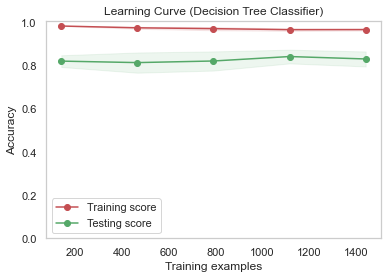

In [185]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

X = X
y = y
title = "Learning Curve (Decision Tree Classifier)"
estimator = DecisionTreeClassifier(max_depth=11, min_samples_split=7, max_features = 6, random_state=42)

plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=1)
plt.show()

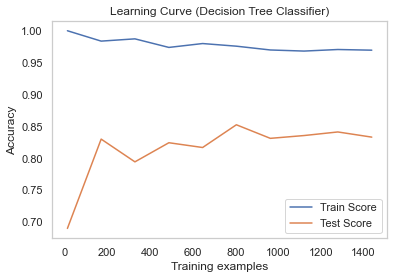

In [186]:
dtc_final3 = DecisionTreeClassifier(max_depth=11, min_samples_split=7, max_features = 6, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(dtc_final3, X, y, cv = cv, scoring = 'accuracy', train_sizes=np.linspace(0.01,1,10))

train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)


plt.title("Learning Curve (Decision Tree Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.plot(train_sizes, train_mean, label='Train Score')
plt.plot(train_sizes, test_mean, label='Test Score')
plt.legend(loc="best")
plt.grid()
plt.show()

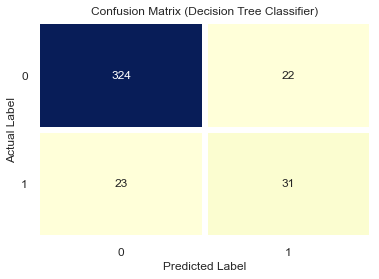

In [187]:
dtc_final3 = DecisionTreeClassifier(max_depth=11, min_samples_split=7, max_features = 6, random_state=42)
dtc_final3.fit(X_train, y_train)
pred_dtc3 = dtc_final3.predict(X_val)

plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix(y_val, pred_dtc3), cmap="YlGnBu", annot=True, fmt= 'd', linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Decision Tree Classifier)", size = 12)
plt.show()

Text(0.5, 1.0, 'Precision Recall Curve (Decision Tree Classifier)')

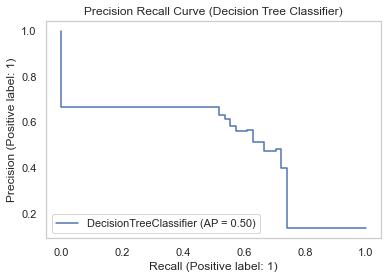

In [188]:
plot_precision_recall_curve(dtc_final3, X_val, y_val)
plt.grid()
plt.title("Precision Recall Curve (Decision Tree Classifier)")

In [189]:
print(classification_report(y_val, pred_dtc3))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       346
           1       0.58      0.57      0.58        54

    accuracy                           0.89       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.89      0.89      0.89       400



# KNN

In [190]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree') 
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val) 
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       346
           1       0.67      0.41      0.51        54

    accuracy                           0.89       400
   macro avg       0.79      0.69      0.72       400
weighted avg       0.88      0.89      0.88       400



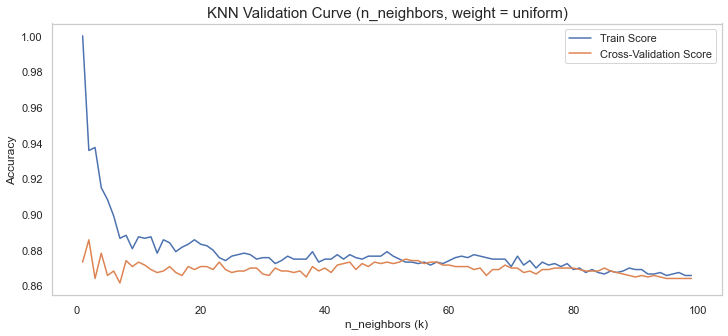

In [191]:
knn_wu_test_scores = []
knn_wu_train_scores = []

for i in range(1,100):

    knn_wu = KNeighborsClassifier(weights = 'uniform', n_neighbors=i, algorithm='kd_tree')
    knn_wu.fit(X_train,y_train)
    
    knn_wu_train_scores.append(knn_wu.score(X_train,y_train))
    knn_wu_test_scores.append(cross_val_score(knn_wu, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("KNN Validation Curve (n_neighbors, weight = uniform)",fontsize= 15)
plt.xlabel("n_neighbors (k)")
plt.ylabel("Accuracy")
plt.plot(range(1,100),knn_wu_train_scores,marker='',label='Train Score')
plt.plot(range(1,100),knn_wu_test_scores,marker='',label='Cross-Validation Score')
plt.grid()
plt.legend(loc="best")

In [192]:
knn_wu_max_test_score = max(knn_wu_test_scores)
knn_wu_test_scores_ind = [i for i, v in enumerate(knn_wu_test_scores) if v == knn_wu_max_test_score]
print('Max test score {} % and k = {}'.format(knn_wu_max_test_score*100,list(map(lambda x: x+1, knn_wu_test_scores_ind))))

Max test score 88.57352941176471 % and k = [2]


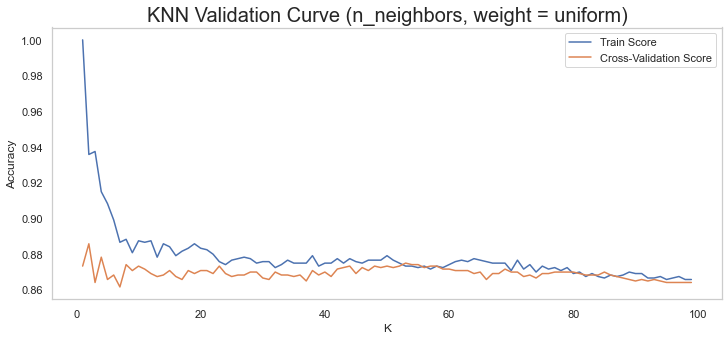

In [193]:
knn_wu2_test_scores = []
knn_wu2_train_scores = []

for i in range(1,100):

    knn_wu2 = KNeighborsClassifier(weights = 'uniform', n_neighbors=i, algorithm='ball_tree')
    knn_wu2.fit(X_train,y_train)
    
    knn_wu2_train_scores.append(knn_wu2.score(X_train,y_train))
    knn_wu2_test_scores.append(cross_val_score(knn_wu2, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("KNN Validation Curve (n_neighbors, weight = uniform)",fontsize= 20)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(range(1,100),knn_wu2_train_scores,marker='',label='Train Score')
plt.plot(range(1,100),knn_wu2_test_scores,marker='',label='Cross-Validation Score')
plt.grid()
plt.legend(loc="best")

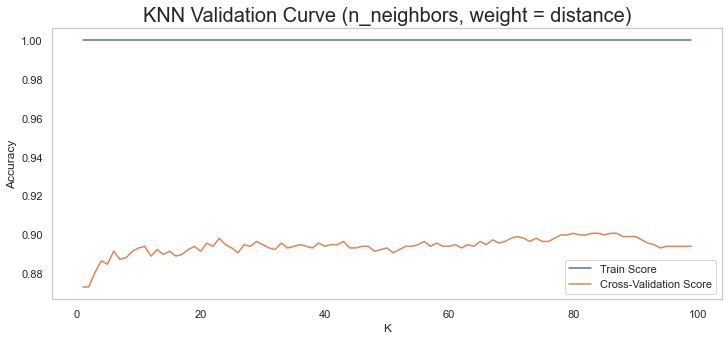

In [194]:
knn_kv_test_scores = []
knn_kv_train_scores = []

for i in range(1,100):

    knn_kv = KNeighborsClassifier(weights = 'distance', n_neighbors=i, algorithm='kd_tree')
    knn_kv.fit(X_train,y_train)
    
    knn_kv_train_scores.append(knn_kv.score(X_train,y_train))
    knn_kv_test_scores.append(cross_val_score(knn_kv, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("KNN Validation Curve (n_neighbors, weight = distance)",fontsize= 20)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(range(1,100),knn_kv_train_scores,marker='',label='Train Score')
plt.plot(range(1,100),knn_kv_test_scores,marker='',label='Cross-Validation Score')
plt.grid()
plt.legend(loc="best")

In [195]:
knn_kv_max_test_score = max(knn_kv_test_scores)
knn_kv_test_scores_ind = [i for i, v in enumerate(knn_kv_test_scores) if v == knn_kv_max_test_score]
print('Max test score {} % and k = {}'.format(knn_kv_max_test_score*100,list(map(lambda x: x+1, knn_kv_test_scores_ind))))

Max test score 90.07492997198881 % and k = [80, 83, 84, 86, 87]


In [196]:
knn_final = KNeighborsClassifier(weights = 'distance', n_neighbors=80, algorithm='kd_tree')
knn_final.fit(X_train, y_train)
y_pred_knn_final = knn_final.predict(X_val)
score_final_knn = knn_final.score(X_val, y_val)

print(score_final_knn)

0.925


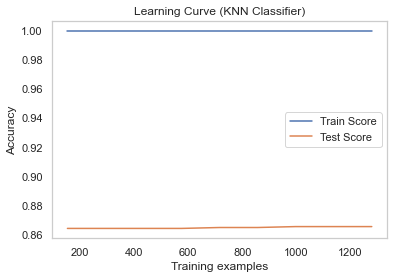

In [197]:
train_sizes, train_scores, test_scores = learning_curve(knn_final, X, y, cv = 5, scoring = 'accuracy', train_sizes=np.linspace(0.01,1,10))

train_mean = np.mean(train_scores, axis = 1)
train_mean

test_mean = np.mean(test_scores, axis = 1)
test_mean

train_sizes

plt.plot(train_sizes, train_mean, label='Train Score')
plt.plot(train_sizes, test_mean, label='Test Score')
plt.grid()
plt.title("Learning Curve (KNN Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")

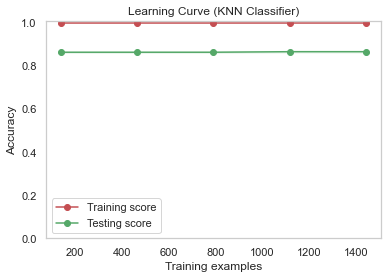

In [198]:
X = X
y = y
title = "Learning Curve (KNN Classifier)"
cv = cv
estimator = knn_final

plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=1)
plt.show()

In [199]:
print(classification_report(y_val, y_pred_knn_final))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       346
           1       0.96      0.46      0.62        54

    accuracy                           0.93       400
   macro avg       0.94      0.73      0.79       400
weighted avg       0.93      0.93      0.91       400



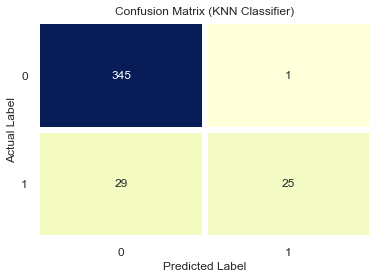

In [200]:
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix(y_val, y_pred_knn_final), cmap="YlGnBu", annot=True, fmt= 'd', linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (KNN Classifier)", size = 12)
plt.show()

Plot ROC Curve

Text(0.5, 1.0, 'ROC Curve (KNN Classifier)')

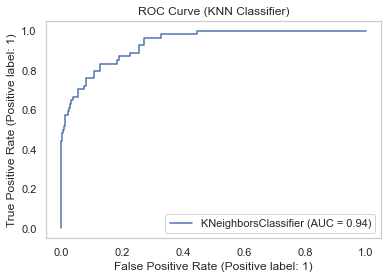

In [201]:
knn_roc_plot = plot_roc_curve(knn_final, X_val, y_val)
plt.grid()
plt.title("ROC Curve (KNN Classifier)")

Text(0.5, 1.0, 'Precision Recall Curve (KNN Classifier)')

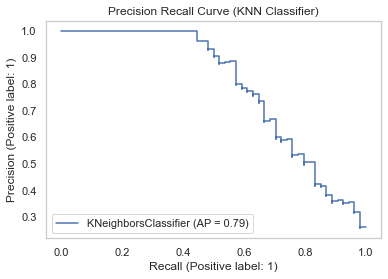

In [202]:
plot_precision_recall_curve(knn_final, X_val, y_val)
plt.grid()
plt.title("Precision Recall Curve (KNN Classifier)")

# SVC

In [203]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_val)

In [222]:
svc = SVC(kernel='linear',C=1)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)

score = svc.score(X_val, y_val)
print(score)

0.865


In [223]:
print(classification_report(y_val, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       346
           1       0.00      0.00      0.00        54

    accuracy                           0.86       400
   macro avg       0.43      0.50      0.46       400
weighted avg       0.75      0.86      0.80       400



In [204]:
svc = SVC(kernel='rbf',C=1)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)

score = svc.score(X_val, y_val)
print(score)

0.9


In [205]:
print(classification_report(y_val, y_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       346
           1       0.79      0.35      0.49        54

    accuracy                           0.90       400
   macro avg       0.85      0.67      0.72       400
weighted avg       0.89      0.90      0.88       400



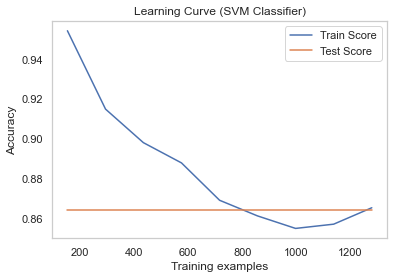

In [206]:
train_sizes, train_scores, test_scores = learning_curve(svc, X, y, cv = 5, scoring = 'accuracy', train_sizes=np.linspace(0.01,1,10))

train_mean = np.mean(train_scores, axis = 1)
train_mean

test_mean = np.mean(test_scores, axis = 1)
test_mean

train_sizes

plt.plot(train_sizes, train_mean, label='Train Score')
plt.plot(train_sizes, test_mean, label='Test Score')
plt.grid()
plt.title("Learning Curve (SVM Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")

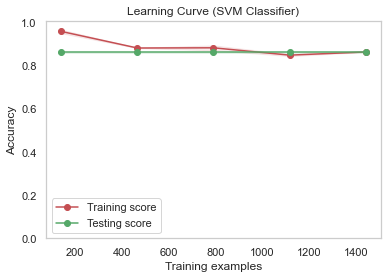

In [207]:
X = X
y = y
title = "Learning Curve (SVM Classifier)"
cv = 10
estimator = svc

plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=1)
plt.show()

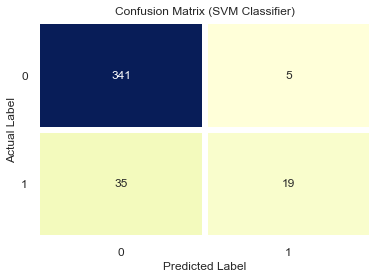

In [208]:
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix(y_val, pred_svc), cmap="YlGnBu", annot=True, fmt= 'd', linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (SVM Classifier)", size = 12)
plt.show()

Text(0.5, 1.0, 'ROC Curve (SVM Classifier)')

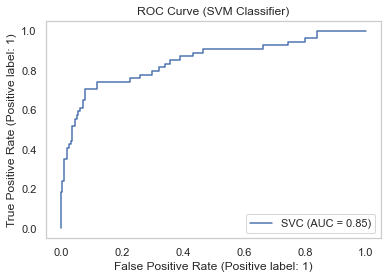

In [209]:
svm_roc_plot = plot_roc_curve(svc, X_val, y_val)
plt.grid()
plt.title("ROC Curve (SVM Classifier)")

Text(0.5, 1.0, 'Precision Recall Curve (SVM Classifier)')

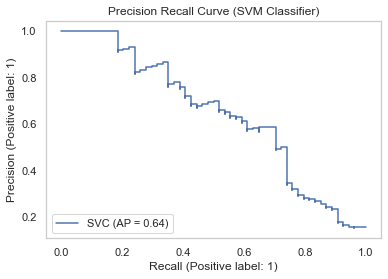

In [210]:
plot_precision_recall_curve(svc, X_val, y_val)
plt.grid()
plt.title("Precision Recall Curve (SVM Classifier)")

In [211]:
print(classification_report(y_val, pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       346
           1       0.79      0.35      0.49        54

    accuracy                           0.90       400
   macro avg       0.85      0.67      0.72       400
weighted avg       0.89      0.90      0.88       400



In [212]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

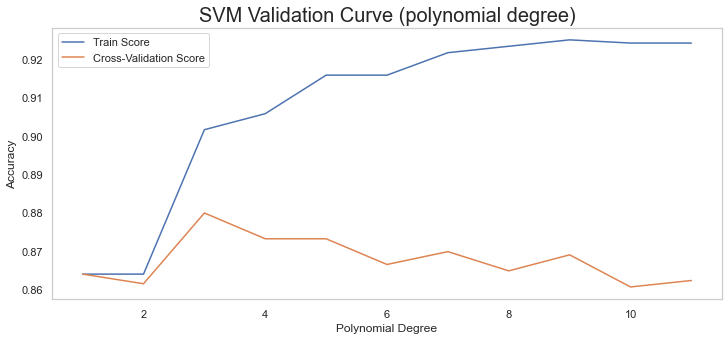

In [213]:
svc_test_scores = []
svc_train_scores = []

for i in range(1,12):

    svc_p = SVC(kernel="poly", degree=i)
    svc_p.fit(X_train,y_train)
    
    svc_train_scores.append(svc_p.score(X_train,y_train))
    svc_test_scores.append(cross_val_score(svc_p, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("SVM Validation Curve (polynomial degree)",fontsize= 20)
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.plot(range(1,12),svc_train_scores,marker='',label='Train Score')
plt.plot(range(1,12),svc_test_scores,marker='',label='Cross-Validation Score')
plt.grid()
plt.legend(loc="best")

In [214]:
svc_max_test_score = max(svc_test_scores)
svc_test_scores_ind = [i for i, v in enumerate(svc_test_scores) if v == svc_max_test_score]
print('Max test score {} % and k = {}'.format(svc_max_test_score*100,list(map(lambda x: x+1, svc_test_scores_ind))))

Max test score 87.99369747899159 % and k = [3]


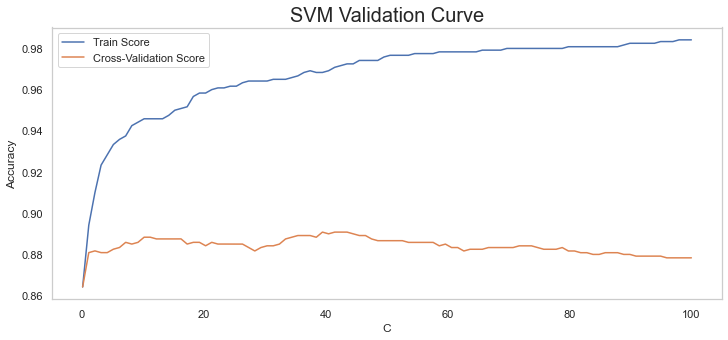

In [230]:
svc_rc_test_scores = []
svc_rc_train_scores = []

for i in np.linspace(0.1, 100, 100):

    svc_rc = SVC(kernel="rbf", C=i, random_state=42)
    svc_rc.fit(X_train,y_train)
    
    svc_rc_train_scores.append(svc_rc.score(X_train,y_train))
    svc_rc_test_scores.append(cross_val_score(svc_rc, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("SVM Validation Curve",fontsize= 20)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(np.linspace(0.1, 100, 100),svc_rc_train_scores,marker='',label='Train Score')
plt.plot(np.linspace(0.1, 100, 100),svc_rc_test_scores,marker='',label='Cross-Validation Score')
plt.grid()
plt.legend(loc="best")

In [ ]:
svc_max_test_score = max(svc_test_scores)
svc_test_scores_ind = [i for i, v in enumerate(svc_test_scores) if v == svc_max_test_score]
print('Max test score {} % and k = {}'.format(svc_max_test_score*100,list(map(lambda x: x+1, svc_test_scores_ind))))

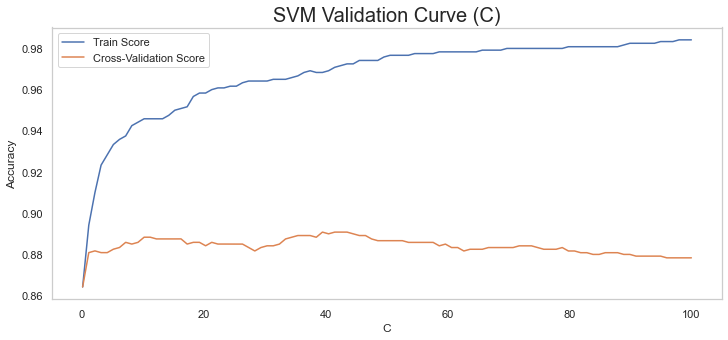

In [231]:
plt.figure(figsize=(12,5))
plt.title("SVM Validation Curve (C)",fontsize= 20)
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.plot(np.linspace(0.1, 100, 100),svc_rc_train_scores,marker='',label='Train Score')
plt.plot(np.linspace(0.1, 100, 100),svc_rc_test_scores,marker='',label='Cross-Validation Score')
plt.grid()
plt.legend(loc="best")

In [229]:
print(svc_rc_test_scores[45])


0.8890406162464985


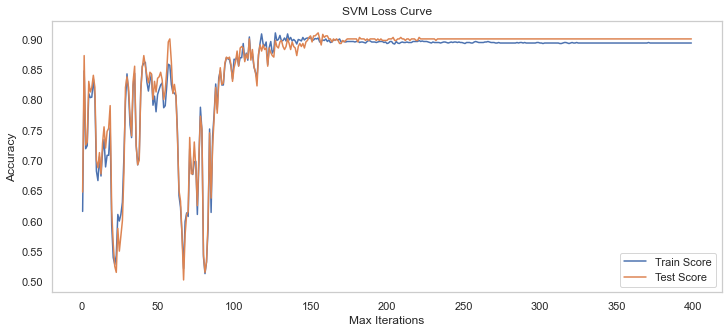

In [221]:
test_scores = []
train_scores = []

for i in range(1,400):

    svc_p = SVC(kernel="rbf", max_iter=i)
    svc_p.fit(X_train,y_train)
    
    train_scores.append(svc_p.score(X_train,y_train))
    test_scores.append(svc_p.score(X_val,y_val))

plt.figure(figsize=(12,5))
plt.title("SVM Loss Curve")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.plot(range(1,400),train_scores,marker='',label='Train Score')
plt.plot(range(1,400),test_scores,marker='',label='Test Score')
plt.grid()
plt.legend(loc="best")

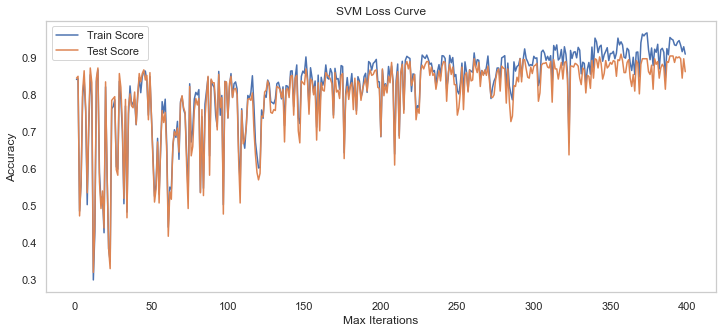

In [232]:
test_scores = []
train_scores = []

for i in range(1,400):

    svc_p = SVC(kernel="rbf", C=45, max_iter=i)
    svc_p.fit(X_train,y_train)
    
    train_scores.append(svc_p.score(X_train,y_train))
    test_scores.append(svc_p.score(X_val,y_val))

plt.figure(figsize=(12,5))
plt.title("SVM Loss Curve")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.plot(range(1,400),train_scores,marker='',label='Train Score')
plt.plot(range(1,400),test_scores,marker='',label='Test Score')
plt.grid()
plt.legend(loc="best")

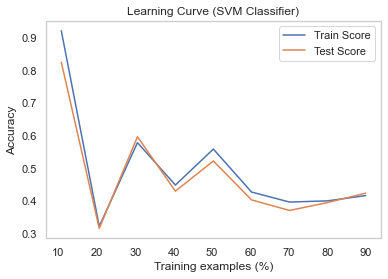

In [240]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel="rbf", C=45, max_iter=25), X, y, cv = cv, scoring = 'accuracy', train_sizes=np.linspace(0.01,1,10))

train_mean = np.mean(train_scores, axis = 1)
train_mean

test_mean = np.mean(test_scores, axis = 1)
test_mean

train_sizes

plt.plot(train_sizes/len(X)*100, train_mean, label='Train Score')
plt.plot(train_sizes/len(X)*100, test_mean, label='Test Score')
plt.grid()
plt.title("Learning Curve (SVM Classifier)")
plt.xlabel("Training examples (%)")
plt.ylabel("Accuracy")
plt.legend(loc="best")

In [291]:
svc = SVC(kernel="rbf", C=1, max_iter=400)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)

score = svc.score(X_val, y_val)
print(score)

0.9


In [292]:
print(classification_report(y_val, y_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       346
           1       0.79      0.35      0.49        54

    accuracy                           0.90       400
   macro avg       0.85      0.67      0.72       400
weighted avg       0.89      0.90      0.88       400



# Boosting

In [241]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=11, max_features=6, min_samples_split=7), random_state=42)
ada.fit(X_train,y_train)
pred_ada=ada.predict(X_val)
score = ada.score(X_val, y_val)

print(score)

0.9375


In [264]:
print(classification_report(y_val, pred_ada))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       346
           1       0.85      0.65      0.74        54

    accuracy                           0.94       400
   macro avg       0.90      0.82      0.85       400
weighted avg       0.93      0.94      0.93       400



In [242]:
ada_train_sizes, ada_train_scores, ada_test_scores = learning_curve(ada, X, y, cv = 5, scoring = 'accuracy', train_sizes=np.linspace(0.01,1,10))

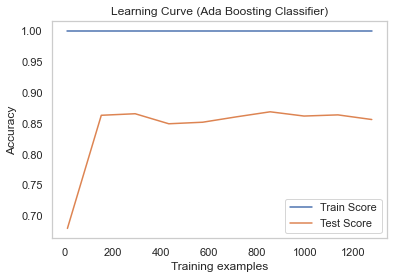

In [243]:
da_train_sizes, ada_train_scores, ada_test_scores = learning_curve(ada, X, y, cv = 5, scoring = 'accuracy', train_sizes=np.linspace(0.01,1,10))
ada_train_mean = np.mean(ada_train_scores, axis = 1)
ada_test_mean = np.mean(ada_test_scores, axis = 1)

plt.plot(ada_train_sizes, ada_train_mean, label='Train Score')
plt.plot(ada_train_sizes, ada_test_mean, label='Test Score')
plt.grid()
plt.title("Learning Curve (Ada Boosting Classifier)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")

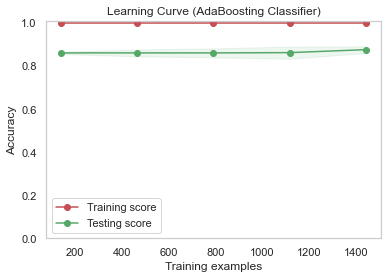

In [244]:
X = X
y = y
title = "Learning Curve (AdaBoosting Classifier)"
cv = 10
estimator = ada

plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=1)
plt.show()

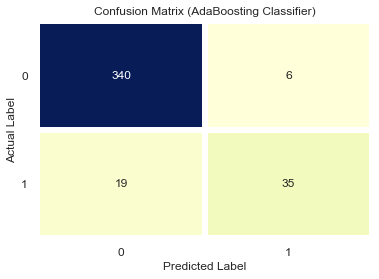

In [245]:
plt.figure(figsize= (6,4))
sns.heatmap(confusion_matrix(y_val, pred_ada), cmap="YlGnBu", annot=True, fmt= 'd', linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (AdaBoosting Classifier)", size = 12)
plt.show()

Text(0.5, 1.0, 'ROC Curve (AdaBoosting Classifier)')

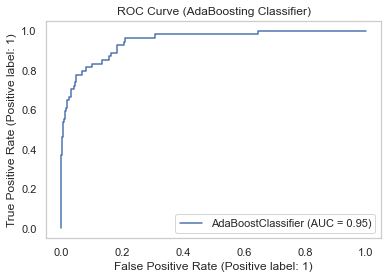

In [246]:
ada_roc_plot = plot_roc_curve(ada, X_val, y_val)
plt.grid()
plt.title("ROC Curve (AdaBoosting Classifier)")

Text(0.5, 1.0, 'Precision Recall Curve (AdaBoosting Classifier)')

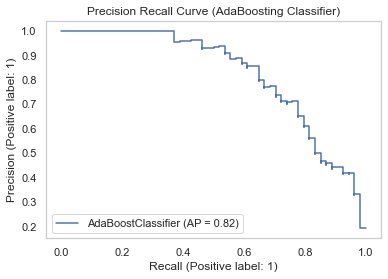

In [247]:
plot_precision_recall_curve(ada, X_val, y_val)
plt.grid()
plt.title("Precision Recall Curve (AdaBoosting Classifier)")

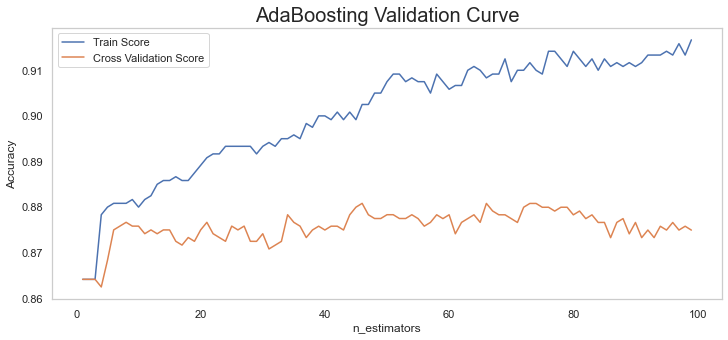

In [256]:
ada_ne_test_scores = []
ada_ne_train_scores = []

for i in range(1,100):
    
    ada_vc = AdaBoostClassifier(n_estimators=i,learning_rate=0.58)
    ada_vc.fit(X_train,y_train)
    
    ada_ne_train_scores.append(ada_vc.score(X_train,y_train))
    ada_ne_test_scores.append(cross_val_score(ada_vc, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("AdaBoosting Validation Curve", fontsize= 20)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.plot(range(1,100),ada_ne_train_scores,marker='',label='Train Score')
plt.plot(range(1,100),ada_ne_test_scores,marker='',label='Cross Validation Score')
plt.grid()
plt.legend(loc="best")

In [257]:
ada_ne_max_test_score = max(ada_ne_test_scores)
ada_ne_test_scores_ind = [i for i, v in enumerate(ada_ne_test_scores) if v == ada_ne_max_test_score]
print('Max test score {} % and n_estimators = {}'.format(ada_ne_max_test_score*100,list(map(lambda x: x+1, ada_ne_test_scores_ind))))

Max test score 88.07282913165267 % and n_estimators = [46]


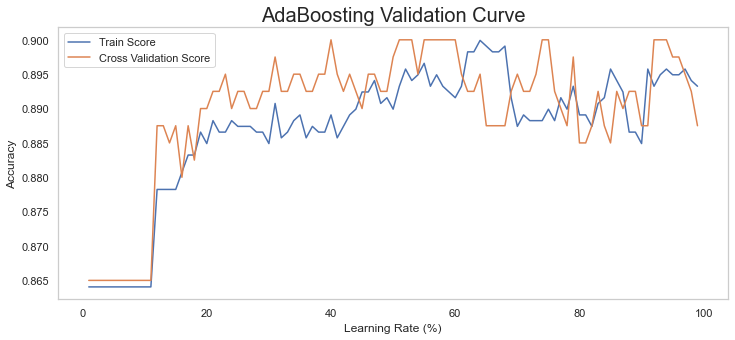

In [258]:
ada_lr_test_scores = []
ada_lr_train_scores = []

for i in range(1,100):
    
    i = i/100
    
    ada_vc2 = AdaBoostClassifier(n_estimators=30,learning_rate = i)
    ada_vc2.fit(X_train,y_train)
    
    ada_lr_train_scores.append(ada_vc2.score(X_train,y_train))
    ada_lr_test_scores.append(ada_vc2.score(X_val,y_val))

plt.figure(figsize=(12,5))
plt.title("AdaBoosting Validation Curve", fontsize= 20)
plt.xlabel("Learning Rate (%)")
plt.ylabel("Accuracy")
plt.plot(range(1,100),ada_lr_train_scores,marker='',label='Train Score')
plt.plot(range(1,100),ada_lr_test_scores,marker='',label='Cross Validation Score')
plt.grid()
plt.legend(loc="best")

In [265]:
ada_p_test_scores = []
ada_p_train_scores = []
DecisionTreeClassifier(max_depth=11, min_samples_split=7, max_features = 6, random_state=42)

for i in range(1,51):
    i = i/100
    
    dtc_final2 = DecisionTreeClassifier(max_depth=7, min_samples_split=7, max_features = 6, min_weight_fraction_leaf = i, random_state=42)
    
    ada_p = AdaBoostClassifier(dtc_final2, n_estimators=46,learning_rate = 0.58)
    ada_p.fit(X_train,y_train)
    
    ada_p_train_scores.append(ada_p.score(X_train,y_train))
    ada_p_test_scores.append(cross_val_score(ada_p, X_train,y_train, cv=cv).mean())


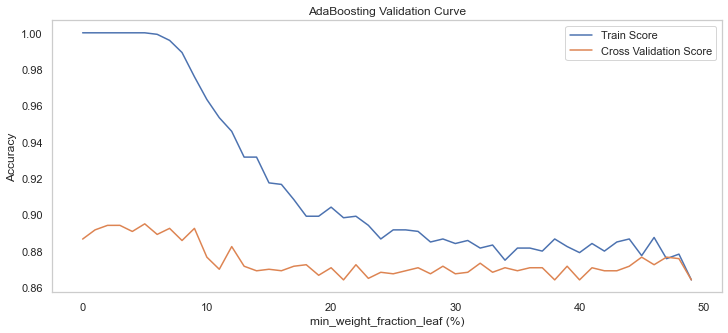

In [267]:
plt.figure(figsize=(12,5))
plt.title("AdaBoosting Validation Curve")
plt.xlabel("min_weight_fraction_leaf (%)")
plt.ylabel("Accuracy")
plt.plot(ada_p_train_scores,marker='',label='Train Score')
plt.plot(ada_p_test_scores,marker='',label='Cross Validation Score')
plt.grid()
plt.legend(loc="best")

In [251]:
ada_lr_max_test_score = max(ada_lr_test_scores)
ada_lr_test_scores_ind = [i for i, v in enumerate(ada_lr_test_scores) if v == ada_lr_max_test_score]
print('Max test score {} % and learning_rate = {}'.format(ada_lr_max_test_score*100,list(map(lambda x: x+1, ada_lr_test_scores_ind))))

Max test score 90.0 % and learning_rate = [40, 51, 52, 53, 55, 56, 57, 58, 59, 60, 74, 75, 92, 93, 94]


In [268]:
ada_f = AdaBoostClassifier(DecisionTreeClassifier(max_depth=11, max_features=6, min_samples_split=7, min_weight_fraction_leaf = 0.04), n_estimators=46,learning_rate=0.58)
ada_f.fit(X_train,y_train)
y_pred_ada = ada_f.predict(X_val)

score = ada_f.score(X_val, y_val)
print(score)

0.9175


In [ ]:
classification 

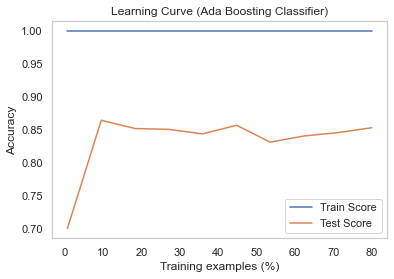

In [269]:
da_train_sizes, ada_train_scores, ada_test_scores = learning_curve(ada_f, X, y, cv = cv, scoring = 'accuracy', train_sizes=np.linspace(0.01,1,10))
ada_train_mean = np.mean(ada_train_scores, axis = 1)
ada_test_mean = np.mean(ada_test_scores, axis = 1)

plt.plot(ada_train_sizes/len(X)*100, ada_train_mean, label='Train Score')
plt.plot(ada_train_sizes/len(X)*100, ada_test_mean, label='Test Score')
plt.grid()
plt.title("Learning Curve (Ada Boosting Classifier)")
plt.xlabel("Training examples (%)")
plt.ylabel("Accuracy")
plt.legend(loc="best")

In [270]:
print(classification_report(y_val, y_pred_ada))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       346
           1       0.72      0.63      0.67        54

    accuracy                           0.92       400
   macro avg       0.83      0.80      0.81       400
weighted avg       0.91      0.92      0.92       400



# ANN

In [273]:
mlp=MLPClassifier(solver='sgd', max_iter=200, warm_start=True)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_val)

In [277]:
print(classification_report(y_val,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       346
           1       0.00      0.00      0.00        54

    accuracy                           0.86       400
   macro avg       0.43      0.50      0.46       400
weighted avg       0.75      0.86      0.80       400



In [278]:
mlp=MLPClassifier(solver='sgd', max_iter=200, warm_start=True, activation= 'logistic')
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_val)

In [279]:
print(classification_report(y_val,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       346
           1       0.00      0.00      0.00        54

    accuracy                           0.86       400
   macro avg       0.43      0.50      0.46       400
weighted avg       0.75      0.86      0.80       400



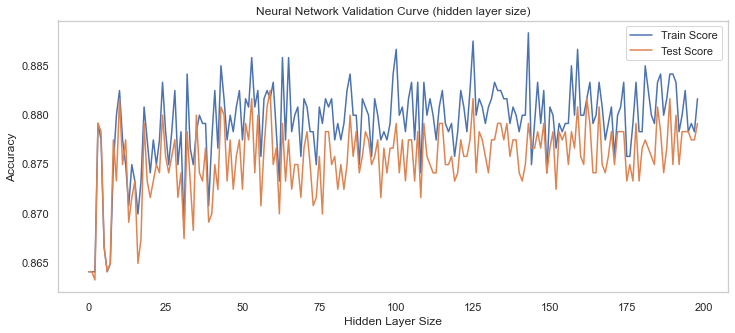

In [280]:
nn_train_scores = []
nn_cross_val_scores = []

for i in range(1,200):
    
    nn_vc = MLPClassifier(solver='sgd', max_iter=200, hidden_layer_sizes = i, random_state=42)
    nn_vc.fit(X_train,y_train)
    
    nn_train_scores.append(nn_vc.score(X_train,y_train))
    nn_cross_val_scores.append(cross_val_score(nn_vc, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("Neural Network Validation Curve (hidden layer size)")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.plot(nn_train_scores,marker='',label='Train Score')
plt.plot(nn_cross_val_scores,marker='',label='Test Score')
plt.grid()
plt.legend(loc="best")

In [281]:
nn_max_test_score = max(nn_cross_val_scores)
nn_test_scores_ind = [i for i, v in enumerate(nn_cross_val_scores) if v == nn_max_test_score]
print('Max test score {} % and Hidden Layer Size = {}'.format(nn_max_test_score*100,list(map(lambda x: x+1, nn_test_scores_ind))))

Max test score 88.24089635854342 % and Hidden Layer Size = [60]


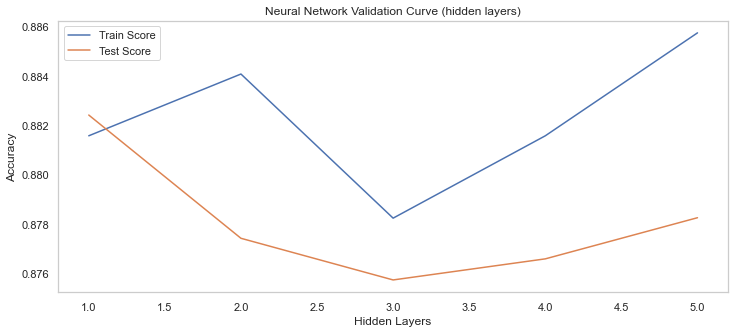

In [284]:
nn_nl_train_scores = []
nn_nl_cross_val_scores = []

layers = [[60], [60, 60], [60,60,60], [60,60,60,60], [60,60,60,60,60]]

for i in layers:
    
    nn_nl = MLPClassifier(solver='sgd', max_iter=200, hidden_layer_sizes = i, random_state=42)
    nn_nl.fit(X_train,y_train)
    
    nn_nl_train_scores.append(nn_nl.score(X_train,y_train))
    nn_nl_cross_val_scores.append(cross_val_score(nn_nl, X_train,y_train, cv=cv).mean())

plt.figure(figsize=(12,5))
plt.title("Neural Network Validation Curve (hidden layers)")
plt.xlabel("Hidden Layers")
plt.ylabel("Accuracy")
plt.plot(range(1, 6),nn_nl_train_scores,marker='',label='Train Score')
plt.plot(range(1, 6),nn_nl_cross_val_scores,marker='',label='Test Score')
plt.grid()
plt.legend(loc="best")

In [285]:
nn_nl_max_test_score = max(nn_nl_cross_val_scores)
nn_nl_test_scores_ind = [i for i, v in enumerate(nn_nl_cross_val_scores) if v == nn_nl_max_test_score]
print('Max test score {} % and Hidden Layers = {}'.format(nn_nl_max_test_score*100,list(map(lambda x: x+1, nn_nl_test_scores_ind))))

Max test score 88.24089635854342 % and Hidden Layers = [1]


In [286]:
nn_f = MLPClassifier(solver='sgd', max_iter=200, hidden_layer_sizes = 60, random_state=42)

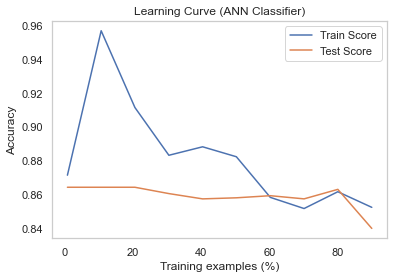

In [287]:
nn_train_sizes, nn_train_scores, nn_test_scores = learning_curve(nn_f, X, y, cv = cv, scoring = 'accuracy', train_sizes=np.linspace(0.01,1,10))
nn_train_mean = np.mean(nn_train_scores, axis = 1)
nn_test_mean = np.mean(nn_test_scores, axis = 1)

plt.plot(nn_train_sizes/len(X)*100, nn_train_mean, label='Train Score')
plt.plot(nn_train_sizes/len(X)*100, nn_test_mean, label='Test Score')
plt.grid()
plt.title("Learning Curve (ANN Classifier)")
plt.xlabel("Training examples (%)")
plt.ylabel("Accuracy")
plt.legend(loc="best")

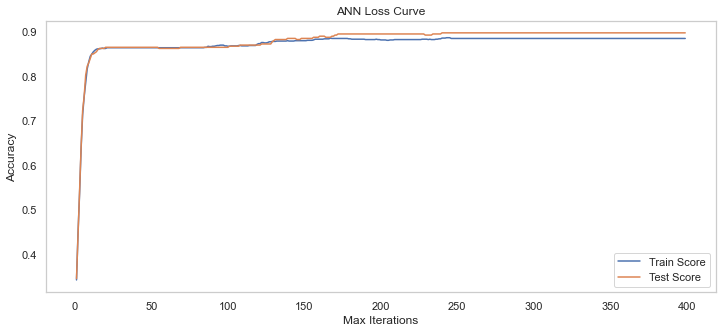

In [295]:
test_scores = []
train_scores = []

for i in range(1,400):

    nn_p = MLPClassifier(solver='sgd', max_iter=i, hidden_layer_sizes = 60, random_state=42)
    nn_p.fit(X_train,y_train)
    
    train_scores.append(nn_p.score(X_train,y_train))
    test_scores.append(nn_p.score(X_val,y_val))

plt.figure(figsize=(12,5))
plt.title("ANN Loss Curve")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.plot(range(1,400),train_scores,marker='',label='Train Score')
plt.plot(range(1,400),test_scores,marker='',label='Test Score')
plt.grid()
plt.legend(loc="best")

In [302]:
nn_f = MLPClassifier(solver='sgd', max_iter=400, hidden_layer_sizes = 60, random_state=42)
nn_f.fit(X_train,y_train)
y_pred_mlp=nn_f.predict(X_val)

In [303]:
print(classification_report(y_val,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       346
           1       0.81      0.31      0.45        54

    accuracy                           0.90       400
   macro avg       0.86      0.65      0.70       400
weighted avg       0.89      0.90      0.88       400

